In [1]:
import torch
import numpy as np
import os
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [2]:
model_path = "./models/model_512/model_59/"

In [3]:
generator = torch.load(model_path + "generator.pth")
discriminator = torch.load(model_path + "discriminator.pth")

generator_state_dict = torch.load(model_path + "generator_state_dict.pth")
discriminator_state_dict = torch.load(model_path + "discriminator_state_dict.pth")

with open(model_path + "model_info.txt") as f:
    model_info = f.read()

In [4]:
model_info

'seconds_per_file: 20\nimage_size: 512\nbatch_size: 8\nn_channels: 1\nz_vector: 128\nn_features_generator: 32\nn_features_discriminator: 32\nnum_epochs: 100\nlr: 0.0002\nbeta1: 0.5\nepoch: 59\n'

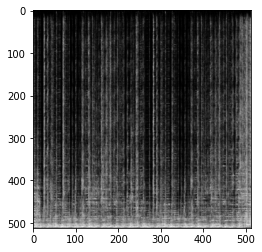

In [5]:
fixed_noise = torch.randn(100, 128, 1, 1, device=device)
fake = generator(fixed_noise).detach().cpu()
plt.imshow(fake[0].reshape(512, 512), cmap='gray')

In [6]:
nome_das_saidas = "teste"
output_path = "./gan_output/teste_512_59"
if not os.path.exists(output_path):
    os.mkdir(output_path)

In [7]:
for idx, f in enumerate(fake):
    plt.imsave(f"{output_path}/{nome_das_saidas}_{idx}.png", f.reshape(512, 512), cmap='gray')